# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv('Car Sales.xlsx - car_data.csv')
data

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Memahami Struktur Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [4]:
data.describe(include="all")

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
count,23906,23906,23905,23906,2.390600e+04,23906,23906,23906,23906,23906,23906,23906.000000,23906,23906,2.390600e+04,23906
unique,23906,612,3021,2,NaN,28,30,154,2,2,3,NaN,7,5,NaN,7
top,C_CND_000001,9/5/2023,Thomas,Male,NaN,Progressive Shippers Cooperative Association No,Chevrolet,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,NaN,85257-3102,SUV,NaN,Austin
freq,1,190,92,18798,NaN,1318,1819,418,12571,12571,11256,NaN,3814,6374,NaN,4135
mean,NaN,NaN,NaN,NaN,8.308403e+05,NaN,NaN,NaN,NaN,NaN,NaN,28090.247846,NaN,NaN,7.497741e+06,NaN
std,NaN,NaN,NaN,NaN,7.200064e+05,NaN,NaN,NaN,NaN,NaN,NaN,14788.687608,NaN,NaN,8.674920e+05,NaN
min,NaN,NaN,NaN,NaN,1.008000e+04,NaN,NaN,NaN,NaN,NaN,NaN,1200.000000,NaN,NaN,6.000101e+06,NaN
25%,NaN,NaN,NaN,NaN,3.860000e+05,NaN,NaN,NaN,NaN,NaN,NaN,18001.000000,NaN,NaN,6.746495e+06,NaN
50%,NaN,NaN,NaN,NaN,7.350000e+05,NaN,NaN,NaN,NaN,NaN,NaN,23000.000000,NaN,NaN,7.496198e+06,NaN
75%,NaN,NaN,NaN,NaN,1.175750e+06,NaN,NaN,NaN,NaN,NaN,NaN,34000.000000,NaN,NaN,8.248146e+06,NaN


### Mengidentifikasi Data yang Hilang dan Data Duplikasi

In [5]:
data.isna().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [6]:
data.duplicated().sum()

0

### Analisis Features Numerik

In [7]:
features_num = data.select_dtypes(include=['int64'])
features_num

,Annual Income,Price ($),Phone
0,13500,26000,8264678
1,1480000,19000,6848189
2,1035000,31500,7298798
3,13500,14000,6257557
4,1465000,24500,7081483
...,...,...,...
23901,13500,12000,8583598
23902,900000,16000,7914229
23903,705000,21000,7659127
23904,13500,31000,6030764


In [8]:
features_num.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


**Analisis Distribusi**

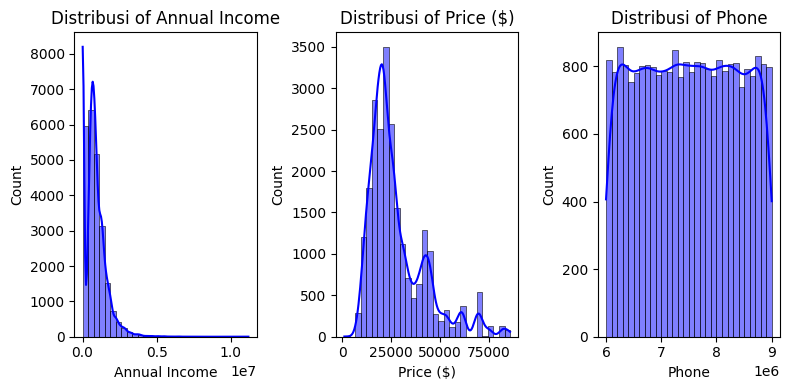

In [9]:
plt.figure(figsize=(8,4))
for i, column in enumerate(features_num.columns, 1):
    plt.subplot(1,3, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f"Distribusi of {column}")
plt.tight_layout()
plt.show()

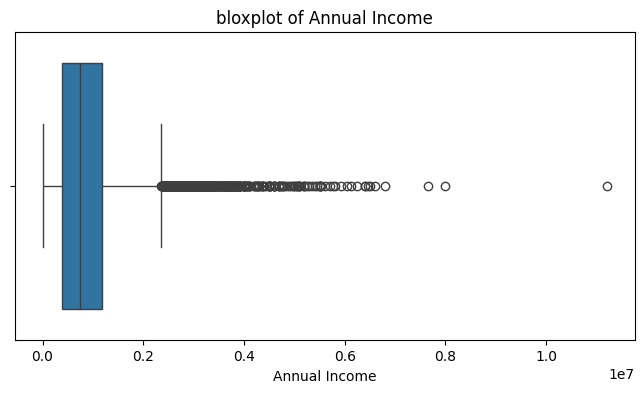

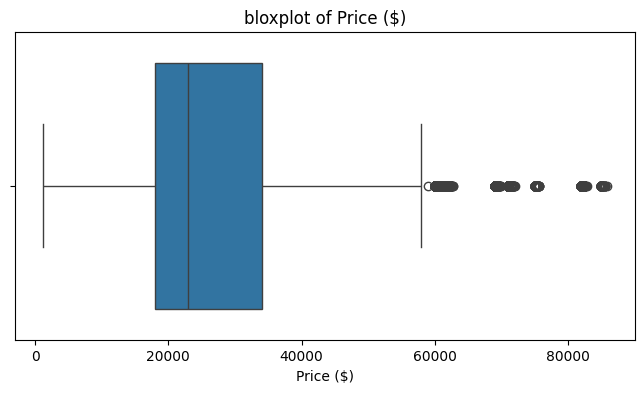

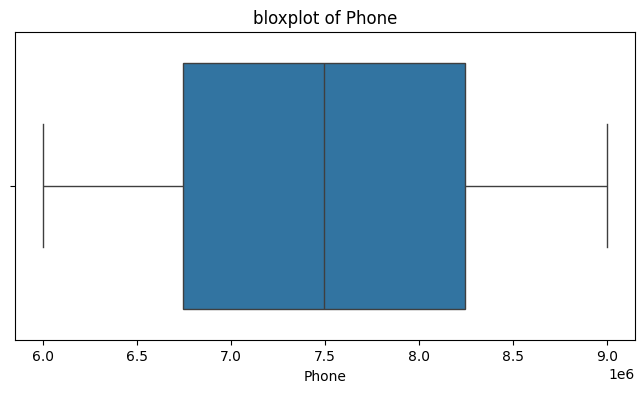

In [10]:
for feature in features_num.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=features_num[feature])
    plt.title(f"bloxplot of {feature}")
    plt.show()

**Analisis Korelasi**

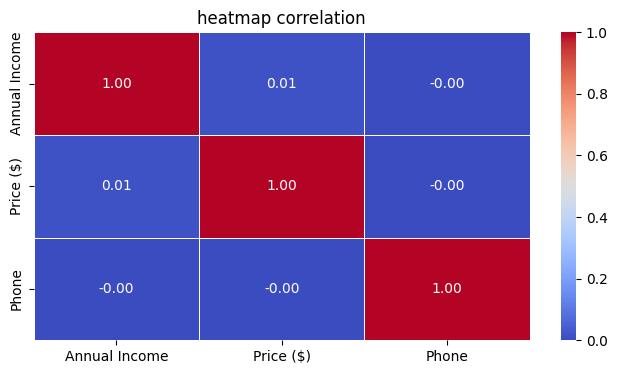

In [11]:
plt.figure(figsize=(8,4))
correlation_matrix = features_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("heatmap correlation")
plt.show()

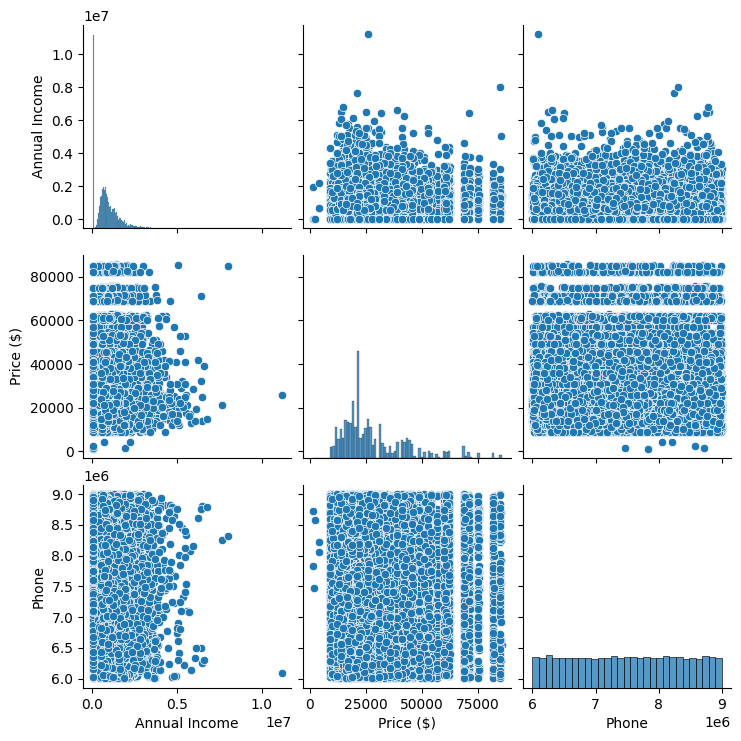

In [12]:
sns.pairplot(features_num)
plt.show()

### Analisis Fitur Kategorikal

In [13]:
features_cat = data.select_dtypes(include=[object])
features_cat

,Car_id,Date,Customer Name,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,SUV,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,60504-7114,SUV,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,38701-8047,Passenger,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,99301-3882,SUV,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,53546-9427,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,60504-7114,Passenger,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,Hardtop,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,99301-3882,Sedan,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,53546-9427,Passenger,Austin


**Menghapus Fitur yang Tidak Berguna**

In [14]:
features_cat = features_cat.drop(columns=["Car_id","Date","Customer Name","Dealer_Name","Dealer_No "])
features_cat

,Gender,Company,Model,Engine,Transmission,Color,Body Style,Dealer_Region
0,Male,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,SUV,Middletown
1,Male,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,SUV,Aurora
2,Male,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,Passenger,Greenville
3,Male,Toyota,Celica,Overhead Camshaft,Manual,Pale White,SUV,Pasco
4,Male,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,Hatchback,Janesville
...,...,...,...,...,...,...,...,...
23901,Male,Plymouth,Voyager,Overhead Camshaft,Manual,Red,Passenger,Pasco
23902,Female,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,Hardtop,Middletown
23903,Male,BMW,328i,Overhead Camshaft,Manual,Red,Sedan,Scottsdale
23904,Male,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,Passenger,Austin


<ipython-input-15-dc3f23f2f96b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features_cat[column], data=features_cat, palette='viridis')
<ipython-input-15-dc3f23f2f96b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features_cat[column], data=features_cat, palette='viridis')
<ipython-input-15-dc3f23f2f96b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features_cat[column], data=features_cat, palette='viridis')
<ipython-input-15-dc3f23f2f96b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

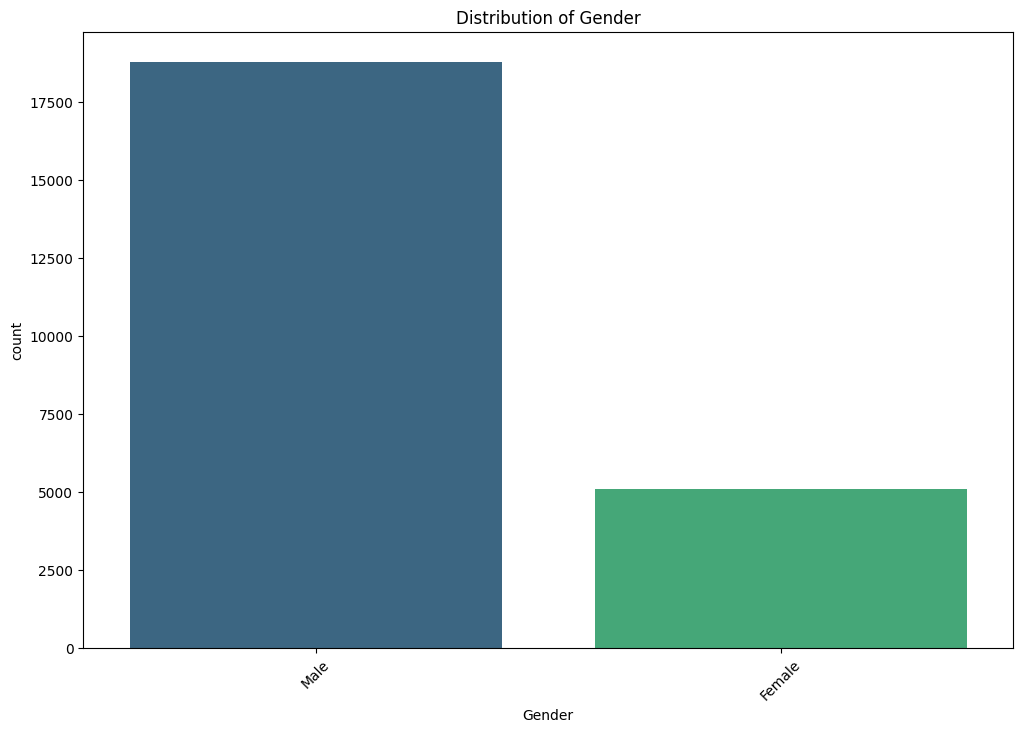

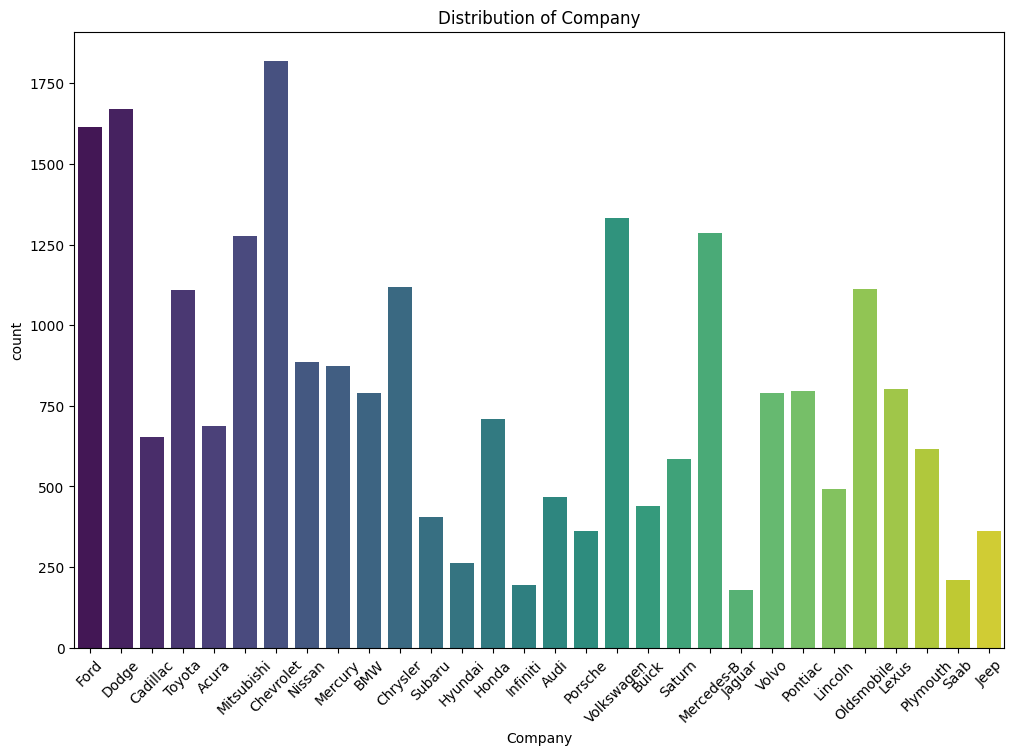

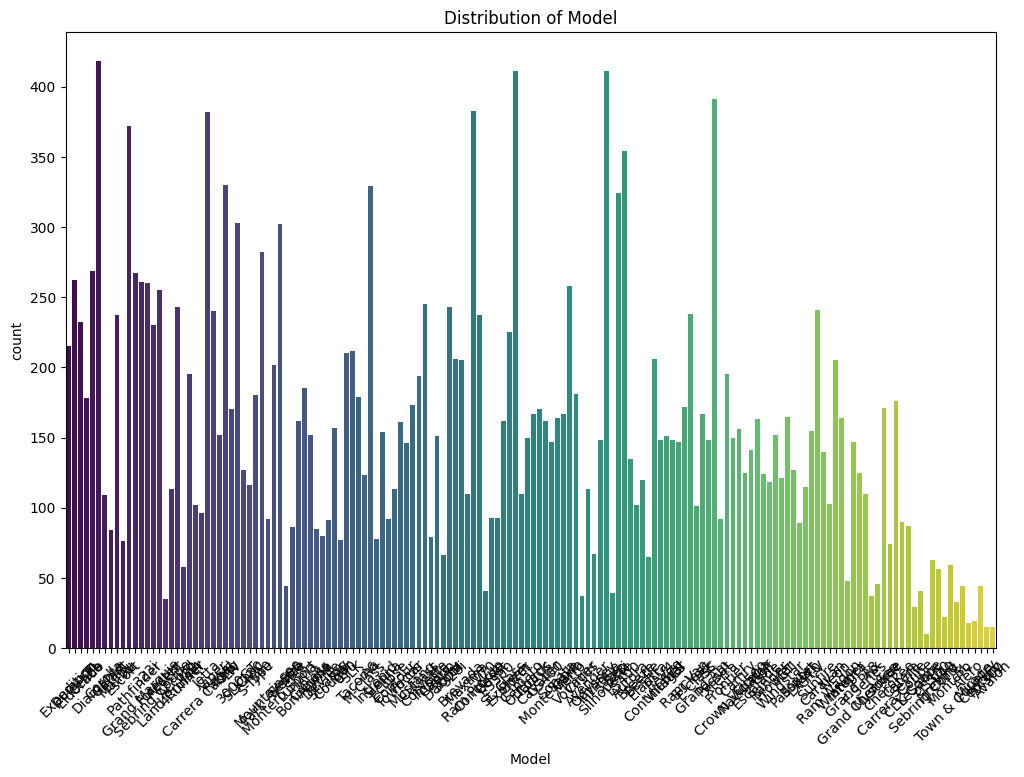

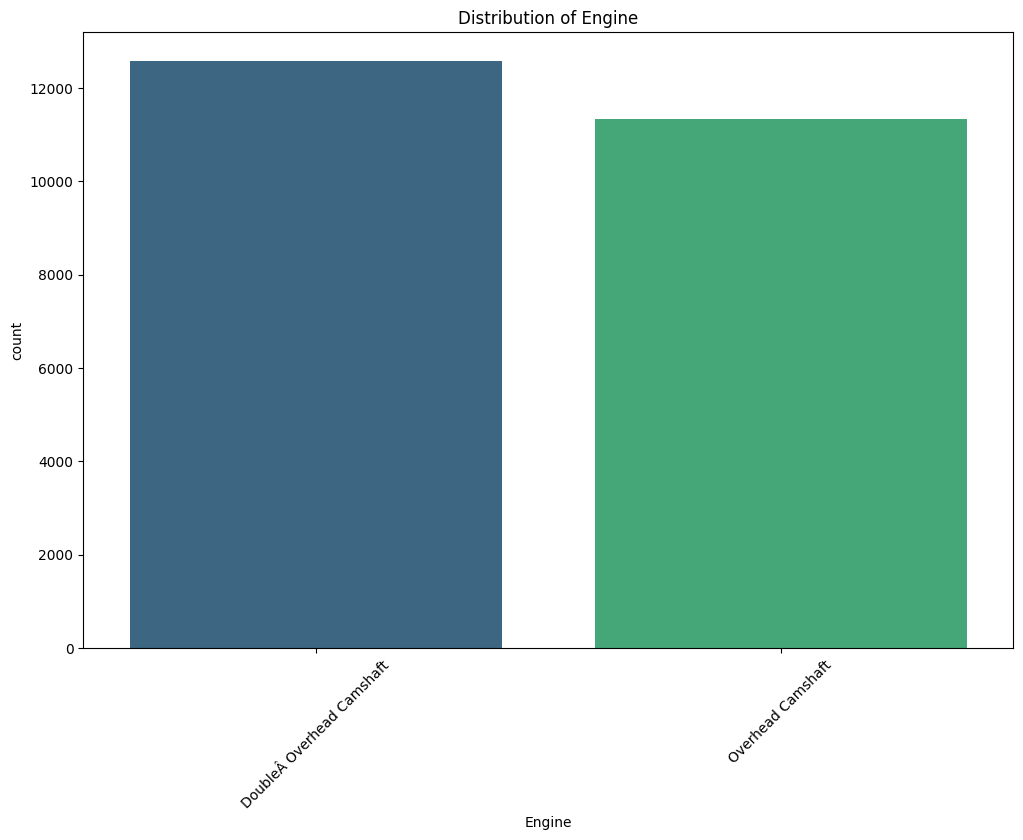

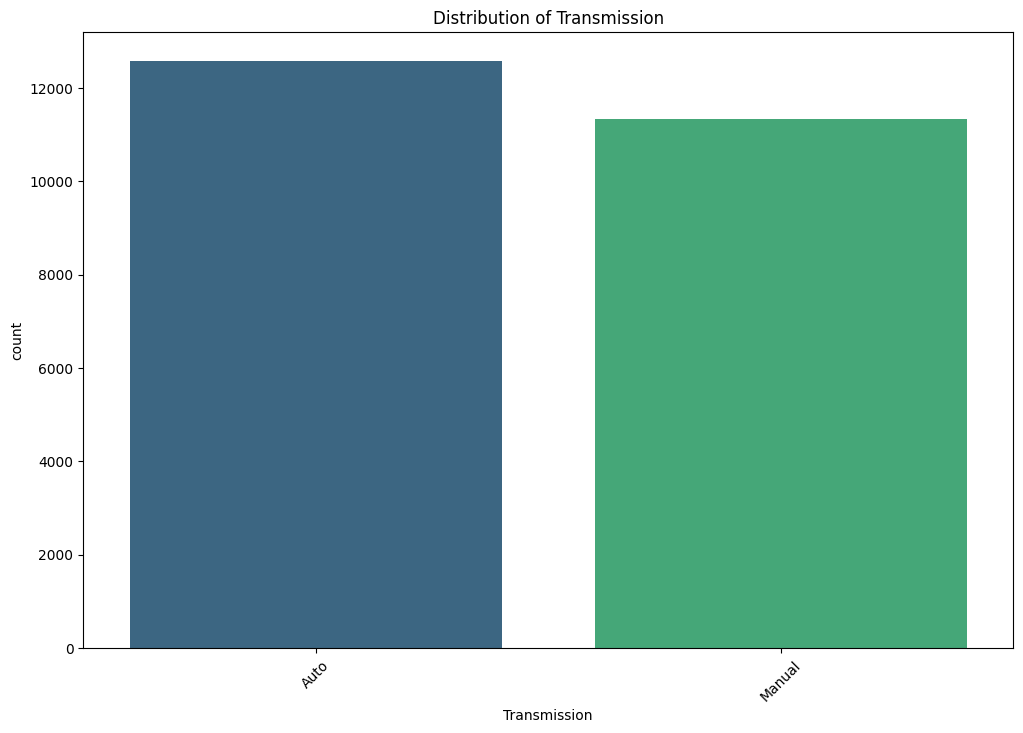

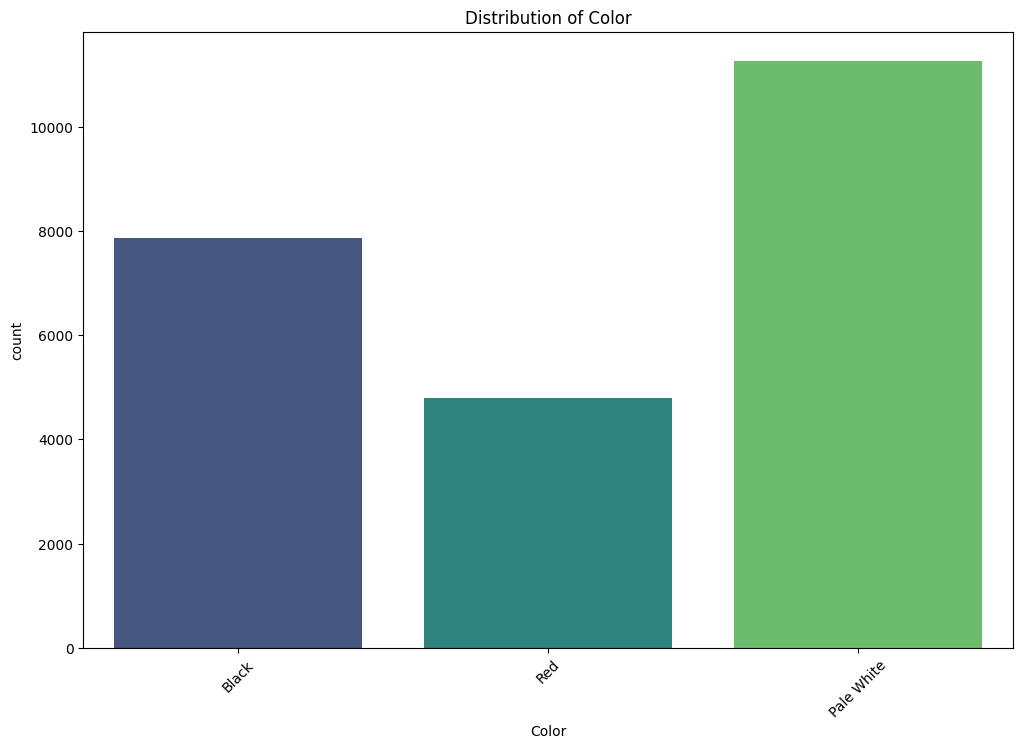

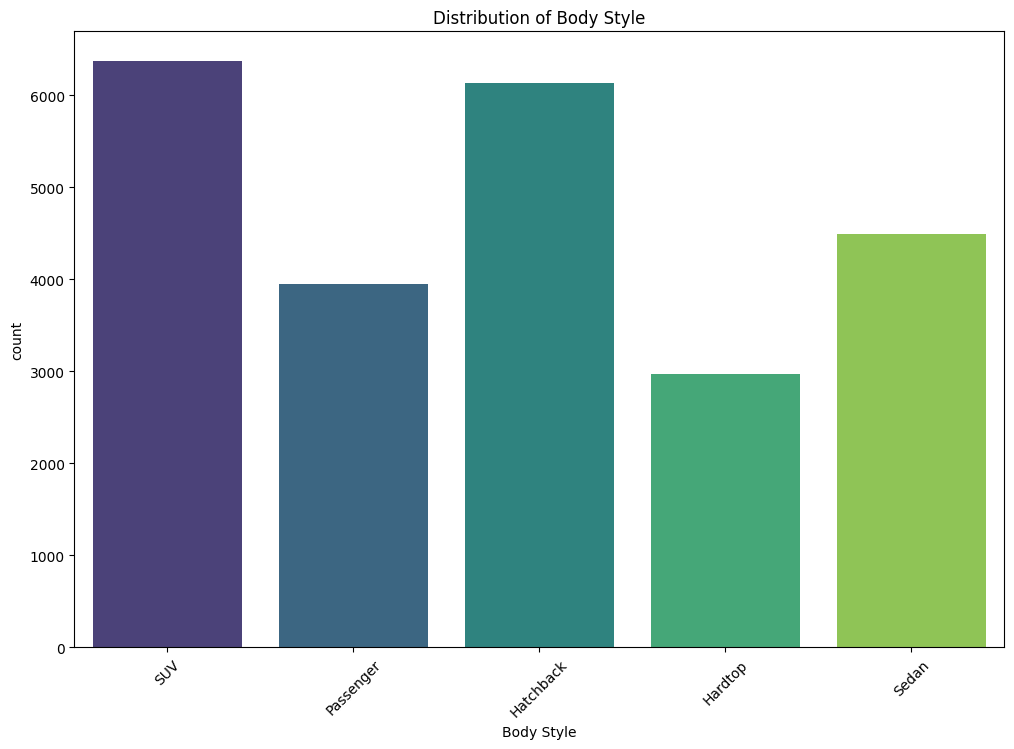

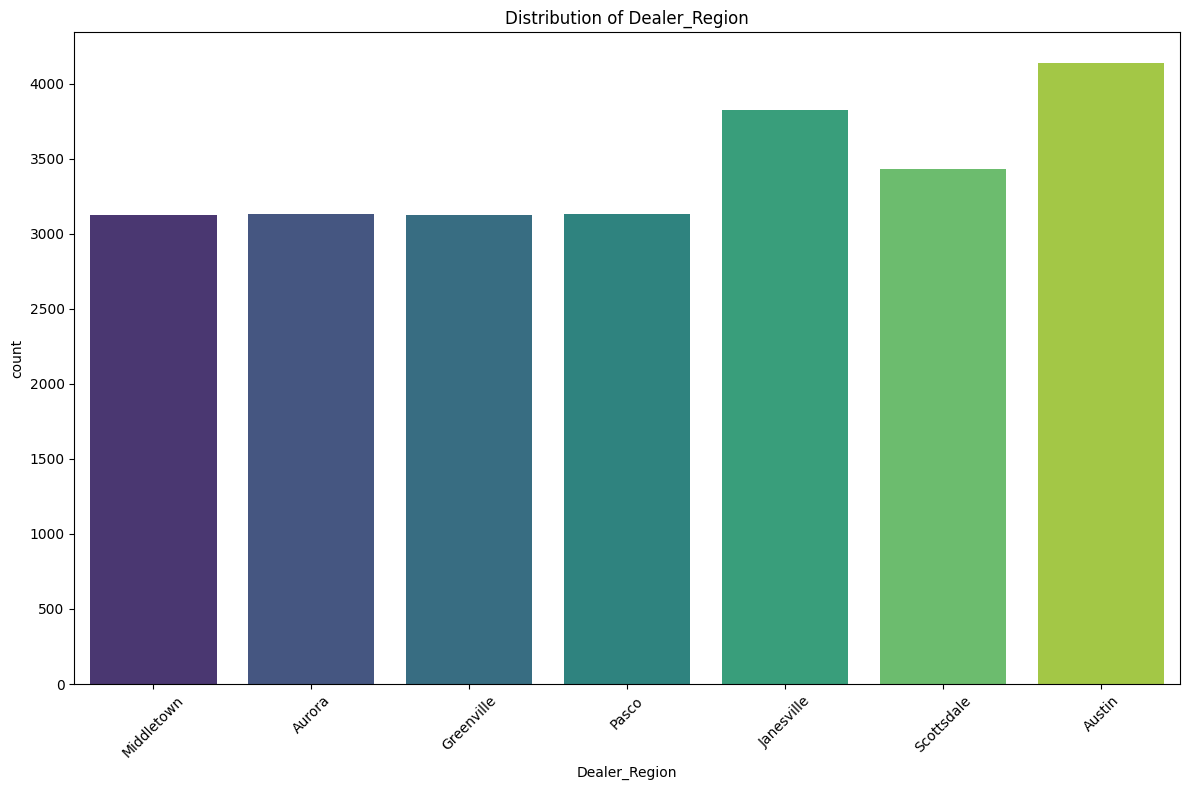

In [15]:
for i, column in enumerate(features_cat.columns, 1):
    plt.figure(figsize=(12,8))
    sns.countplot(x=features_cat[column], data=features_cat, palette='viridis')
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Encoding Data Kategorial

In [16]:
label_encoder = LabelEncoder()

for column in features_cat.columns:
    data[column] = label_encoder.fit_transform(data[column])

data

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,1,13500,Buddy Storbeck's Diesel Service Inc,8,60,0,0,0,26000,06457-3834,3,8264678,4
1,C_CND_000002,1/2/2022,Gia,1,1480000,C & M Motors Inc,7,52,0,0,0,19000,60504-7114,3,6848189,0
2,C_CND_000003,1/2/2022,Gianna,1,1035000,Capitol KIA,4,57,1,1,2,31500,38701-8047,2,7298798,2
3,C_CND_000004,1/2/2022,Giselle,1,13500,Chrysler of Tri-Cities,27,36,1,1,1,14000,99301-3882,3,6257557,5
4,C_CND_000005,1/2/2022,Grace,1,1465000,Chrysler Plymouth,0,141,0,0,2,24500,53546-9427,1,7081483,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,1,13500,C & M Motors Inc,21,150,1,1,2,12000,60504-7114,2,8583598,5
23902,C_CND_023903,12/31/2023,Jimmy,0,900000,Ryder Truck Rental and Leasing,5,109,0,0,0,16000,06457-3834,0,7914229,4
23903,C_CND_023904,12/31/2023,Emma,1,705000,Chrysler of Tri-Cities,2,4,1,1,2,21000,99301-3882,4,7659127,6
23904,C_CND_023905,12/31/2023,Victoire,1,13500,Chrysler Plymouth,5,93,0,0,0,31000,53546-9427,2,6030764,1


### Membersihkan Data Dari Fitur-Fitur yang Tidak Informatif

In [17]:
data = data.drop(columns=["Car_id","Date","Customer Name","Dealer_Name","Dealer_No ", "Phone", "Dealer_Region"])
data

,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Body Style
0,1,13500,8,60,0,0,0,26000,3
1,1,1480000,7,52,0,0,0,19000,3
2,1,1035000,4,57,1,1,2,31500,2
3,1,13500,27,36,1,1,1,14000,3
4,1,1465000,0,141,0,0,2,24500,1
...,...,...,...,...,...,...,...,...,...
23901,1,13500,21,150,1,1,2,12000,2
23902,0,900000,5,109,0,0,0,16000,0
23903,1,705000,2,4,1,1,2,21000,4
23904,1,13500,5,93,0,0,0,31000,2


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

**Menentukan Jumlah Cluster Optimal**

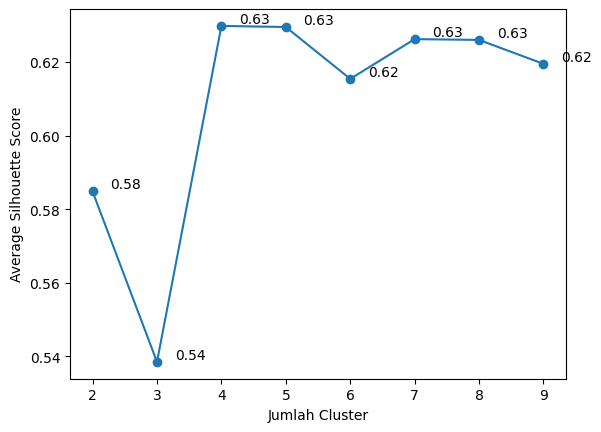

In [18]:
range_n_cluster = range(2,10)
silhouette_scores = []


for n_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_cluster, silhouette_scores, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Average Silhouette Score")

for i, score in enumerate(silhouette_scores):
    plt.text(range_n_cluster[i] + 0.75, score, f"{score:.2f}", ha='right', va='bottom')

plt.grid(False)
plt.show()

**Melatih Model**

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

**Evaluasi Model Dengan Silhouette Score**

In [20]:
evaluasi = silhouette_score(data, kmeans.fit_predict(data))
evaluasi

0.629842709659937

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

**Melakukan Feature Selection Dengan Variance Threshold**

In [21]:
selector = VarianceThreshold(threshold=1)

selector.fit(data)
features = selector.get_support(indices=True)

data_selection = data.iloc[:, features]

data_selection

,Annual Income,Company,Model,Price ($),Body Style
0,13500,8,60,26000,3
1,1480000,7,52,19000,3
2,1035000,4,57,31500,2
3,13500,27,36,14000,3
4,1465000,0,141,24500,1
...,...,...,...,...,...
23901,13500,21,150,12000,2
23902,900000,5,109,16000,0
23903,705000,2,4,21000,4
23904,13500,5,93,31000,2


**Menentukan Jumlah Cluster Optimal**

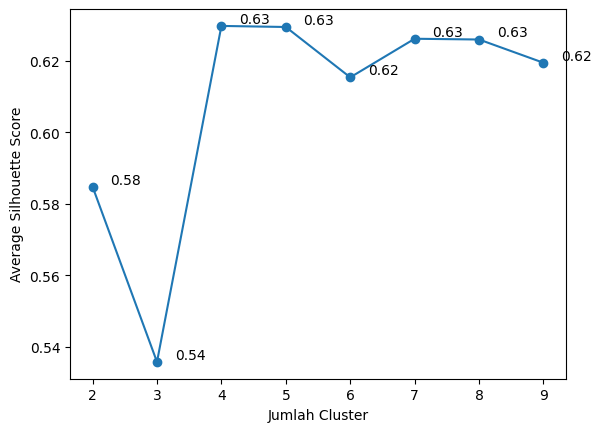

In [22]:
range_n_cluster = range(2,10)
silhouette_scores = []


for n_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data_selection)
    silhouette_avg = silhouette_score(data_selection, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_cluster, silhouette_scores, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Average Silhouette Score")

for i, score in enumerate(silhouette_scores):
    plt.text(range_n_cluster[i] + 0.75, score, f"{score:.2f}", ha='right', va='bottom')

plt.grid(False)
plt.show()

**Melatih Modul Menggunkan Data yang telah Melalui Feature Selection**

In [23]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_selection)

KMeans(n_clusters=4, random_state=0)

**Evaluasi Model Dengan Silhouette Score**

In [24]:
evaluasi = silhouette_score(data_selection, kmeans.fit_predict(data_selection))
evaluasi

0.6298427102836633

Nilai silhouette score sebelum feature selection: 0.629842709659937

Nilai silhouette score sesudah feature selection: 0.6298427102836633

Dari kedua nilai silhouette score di atas, terlihat hampir tidak ada perbedaan yang signifikan. Hal ini mungkin bisa terjadi karena di tahap preprosessing sudah dilakukan pembuangan untuk fitur-fitur yang tidak banyak mengandung informasi.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

**Visualisasi Hasil Clustering Menggunakan Pairplot**

<ipython-input-25-29e9e588c19b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selection["Cluster"] = labels


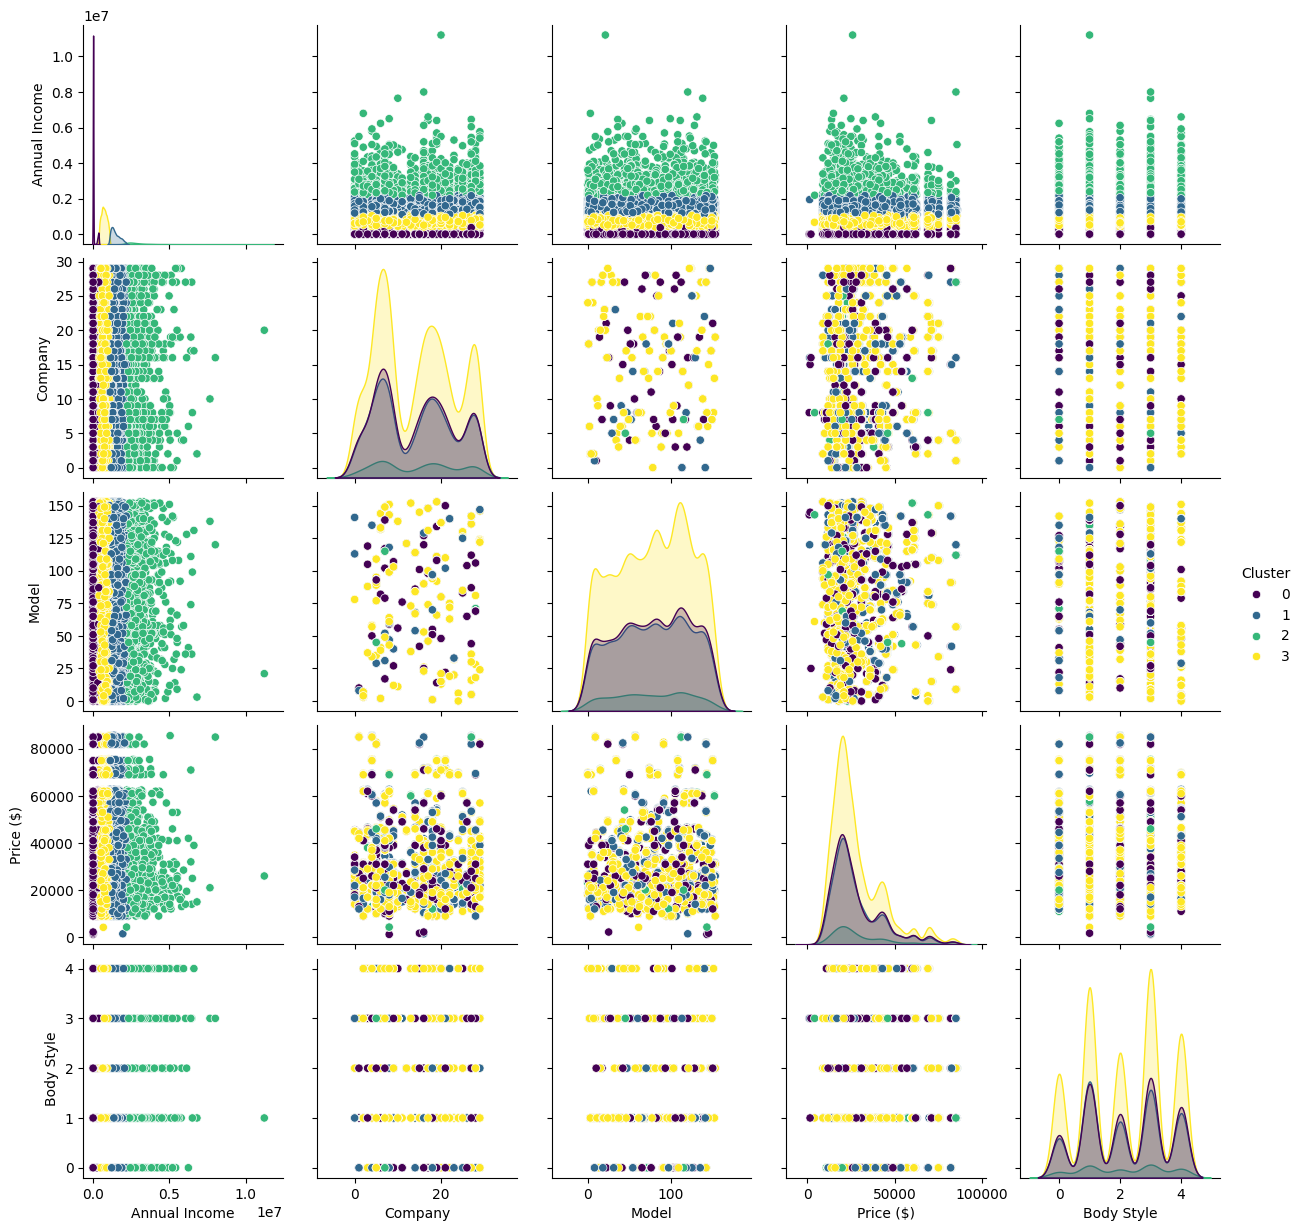

In [25]:
labels = kmeans.labels_
data_selection["Cluster"] = labels

sns.pairplot(data_selection, hue="Cluster", palette='viridis', markers='o')

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Analisis Karakteristik Setiap Cluster**

In [26]:
labels = kmeans.labels_
k = 4
def analyze_cluster(data_selection, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = data_selection[labels == cluster_id]
        mean_Aincome = cluster_data['Annual Income'].mean()
        mode_company = cluster_data['Company'].mode()
        mode_model = cluster_data['Model'].mode()
        mean_price = cluster_data['Price ($)'].mean()
        mode_body = cluster_data['Body Style'].mode()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Aincome: {mean_Aincome:.2f}")
        print(f"company: {mode_company}")
        print(f"model: {mode_model}")
        print(f"price: {mean_price:.2f}")
        print(f"body: {mode_body}")


analyze_cluster(data_selection, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Aincome: 50588.93
company: 0    5
Name: Company, dtype: int64
model: 0    106
Name: Model, dtype: int64
price: 27949.44
body: 0    3
Name: Body Style, dtype: int64

Cluster 2:
Aincome: 1469182.95
company: 0    5
Name: Company, dtype: int64
model: 0    51
Name: Model, dtype: int64
price: 28013.14
body: 0    1
Name: Body Style, dtype: int64

Cluster 3:
Aincome: 2914406.90
company: 0    7
Name: Company, dtype: int64
model: 0    106
Name: Model, dtype: int64
price: 28996.50
body: 0    3
Name: Body Style, dtype: int64

Cluster 4:
Aincome: 724149.28
company: 0    5
Name: Company, dtype: int64
model: 0    109
Name: Model, dtype: int64
price: 28116.38
body: 0    3
Name: Body Style, dtype: int64


Tulis hasil interpretasinya di sini.
1. Cluster 1:
* Rata-Rata Annual Income: 50588.93
* Rata-Rata Harga Mobil: 27949.44
* Merek Mobil Paling Banyak Diminati: Chevrolet
* Model Mobil Paling Banyak Diminati: Passat
* Body Style yang Banyak Diminati: SUV

Analisis: Cluster ini terdiri dari pelanggan yang memiliki pendapatan tahunan rendah dengan mobil yang dibeli dengan harga yang rendah juga. Selain itu, dalam cluster ini pelanggan sangat meminati mobil yang bermerek Chevrolet dan juga sangat meminati mobil dengan body style SUV. Namun, di sisi lain pelanggan juga sangat meminati mobil dengan model Passat yang merupakan medel keluaran merek Volkswagen dengan body style hatchback, yang artinya selain didominasi oleh pelanggan yang meminati merek Chevrolet cluster ini juga didominasi oleh pelanggaan yang meminati merek Volkswagen dan juga selain didominasi oleh pelanggan yang meminati body style SUV cluster ini juga didominasi oleh pelanggaan yang meminati body style hatchback. Berdasarkan hal-hal tersebut, dapat disimpulkan bahwa kemungkinan besar cluster ini terdiri dari pelanggan yang mengedepankan fungsionalitas, harga murah, serta memiliki kekayaan rendah dan juga pelanggan yang mengedepankan desain eksterior, harga murah, serta memiliki kekayaan yang juga rendah.

2. Cluster 2:
* Rata-Rata Annual Income: 1469182.95
* Rata-Rata Harga Mobil: 28013.14
* Merek Mobil Paling Banyak Diminati: Chevrolet
* Model Mobil Paling Banyak Diminati: Diamante
* Body Style yang Banyak Diminati: Hatchback

Analisis: Cluster ini menunjukkan pelanggan dengan pendapatan tinggi dengan mobil yang dibeli dengan harga sedang. Selain itu, dalam cluster ini telah ditunjukkan bahwa pelanggan sangat meminati mobil yang bermerek Chevrolet dan juga sangat meminati mobil dengan body style Hatchback. Namun, di sisi lain pelanggan juga sangat meminati mobil dengan model Diamante yang merupakan medel keluaran merek Mitsubishi dengan body style hatchback, yang artinya selain didominasi oleh pelanggan yang meminati merek Chevrolet cluster ini juga didominasi oleh pelanggaan yang meminati merek Mitsubishi. Berdasarkan hal-hal tersebut, dapat disimpulkan bahwa kemungkinan besar cluster ini terdiri dari pelanggan yang mengedepankan desain eksterior (seperti anak muda atau mereka yang berjiwa muda), harga sedang saja, serta memiliki kekayaan yang tinggi.

3. Cluster 3:
* Rata-Rata Annual Income: 2914406.90
* Rata-Rata Harga Mobil: 28996.50
* Merek Mobil Paling Banyak Diminati: Dodge
* Model Mobil Paling Banyak Diminati: Passat
* Body Style yang Banyak Diminati: SUV

Analisis: Cluster ini mencangkup pelanggan dengan pendapatan sangat tinggi dengan mobil yang dibeli dengan harga yang sangat tinggi juga. Selain itu, cluster ini juga mencangkup pelanggan yang sangat meminati mobil yang bermerek Dodge dan juga sangat meminati mobil dengan body style SUV. Namun, di sisi lain pelanggan juga sangat meminati mobil dengan model Passat yang merupakan medel keluaran merek Volkswagen dengan body style hatchback, yang artinya selain didominasi oleh pelanggan yang meminati merek Dodge cluster ini juga didominasi oleh pelanggaan yang meminati merek Volkswagen dan juga selain didominasi oleh pelanggan yang meminati body style SUV cluster ini juga didominasi oleh pelanggaan yang meminati body style hatchback. Berdasarkan hal-hal tersebut, dapat disimpulkan bahwa kemungkinan besar cluster ini terdiri dari pelanggan premium yang mengedepankan fungsionalitas, harga tinggi tidak masalah, serta memiliki kekayaan yang sangat tinggi dan juga pelanggan yang mengedepankan desain eksterior, harga tinggi tidak masalah, serta memiliki kekayaan yang juga sangat tinggi.

4. Cluster 4:
* Rata-Rata Annual Income: 724149.28
* Rata-Rata Harga Mobil: 28116.38
* Merek Mobil Paling Banyak Diminati: Chevrolet
* Model Mobil Paling Banyak Diminati: Prizm
* Body Style yang Banyak Diminati: SUV

Analisis: Cluster ini memperlihatkan pelanggan dengan pendapatan tahunan sedang dengan mobil yang dibeli dengan harga yang tinggi. Selain itu, cluster ini juga memperlihatkan bahwa pelanggan sangat meminati mobil yang bermerek Chevrolet dan juga sangat meminati mobil dengan body style SUV. Di sisi lain, pelanggan juga sangat meminati mobil dengan model Prizm yang juga merupakan model keluaran merek Chevrolet dengan body style Hardtop, yang artinya selain didominasi oleh pelanggan yang meminati body style SUV cluster ini juga didominasi oleh pelanggaan yang meminati body style hardtop. Berdasarkan hal-hal tersebut, dapat disimpulkan bahwa kemungkinan besar cluster ini terdiri dari pelanggan yang mengedepankan fungsionalitas, harga tinggi tidak masalah, serta memiliki kekayaan sedang dan juga pelanggan yang mengedepankan desain klasik atau mobil mewah, harga tinggi tidak masalah, serta memiliki kekayaan yang juga sedang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
data_selection.to_csv("project_clus_fix.csv", index=False)